In [17]:
!gdown 1vzbuiyOL5ddeCSBY2ZTospiKt8qYnT1v


Downloading...
From: https://drive.google.com/uc?id=1vzbuiyOL5ddeCSBY2ZTospiKt8qYnT1v
To: /content/t_s1_am_6am.csv
100% 1.54M/1.54M [00:00<00:00, 11.8MB/s]


In [18]:
import pandas as pd

# Replace 'filename.csv' with the actual name of the file downloaded in Step 3
# You can check the filename by clicking the "Folder" icon on the left sidebar in Colab
df = pd.read_csv('/content/t_s1_am_6am.csv')

# View the first few rows
df.head()

,VV,VH,smap_am,soil_moisture
0,-9.058618,-15.982408,0.284554,0.301
1,-9.511266,-18.085192,0.218601,0.172
2,-10.926619,-19.470199,0.286454,0.485
3,-8.650778,-14.840568,0.407210,0.143
4,-6.633557,-13.470629,0.420252,0.375


# EDA


================ BASIC INFO ================

Shape of dataset: (30747, 4)

Column Names:
 ['VV', 'VH', 'smap_am', 'soil_moisture']

Data Types:

VV               float64
VH               float64
smap_am          float64
soil_moisture    float64
dtype: object

Missing Values:

VV               0
VH               0
smap_am          0
soil_moisture    0
dtype: int64

Duplicate Rows: 13

================ STATISTICAL SUMMARY ================



,VV,VH,smap_am,soil_moisture
count,30747.000000,30747.000000,30747.000000,30747.000000
mean,-9.195999,-16.417307,0.147262,0.412488
std,2.943375,3.413569,0.121603,17.746967
min,-26.670000,-35.349515,0.000000,0.000000
25%,-10.845618,-18.014890,0.071006,0.078000
50%,-9.104179,-15.783631,0.125384,0.174000
75%,-7.631939,-14.171636,0.202437,0.279000
max,5.057968,-4.289361,0.674961,1396.570000


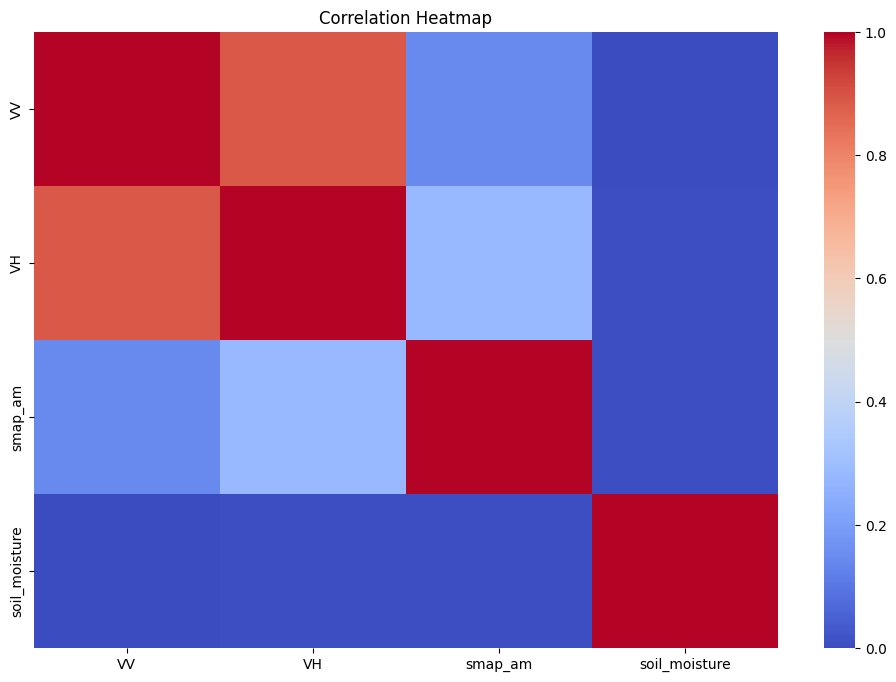

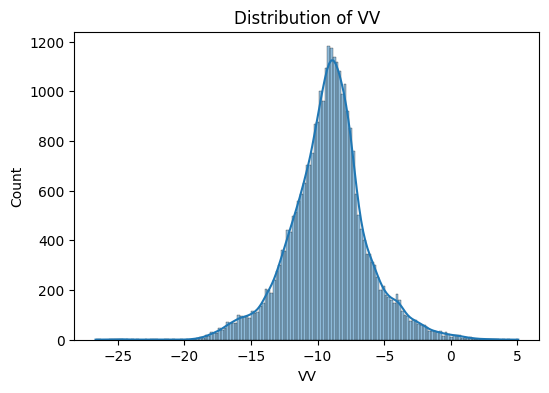

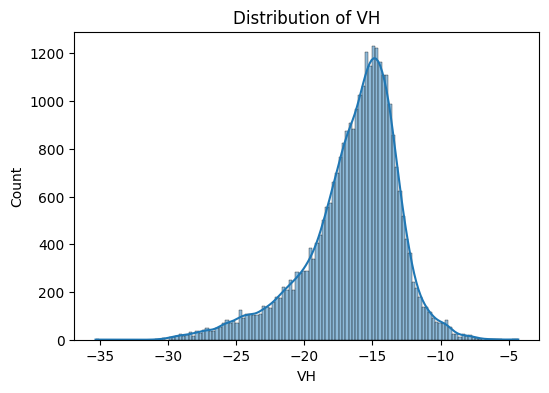

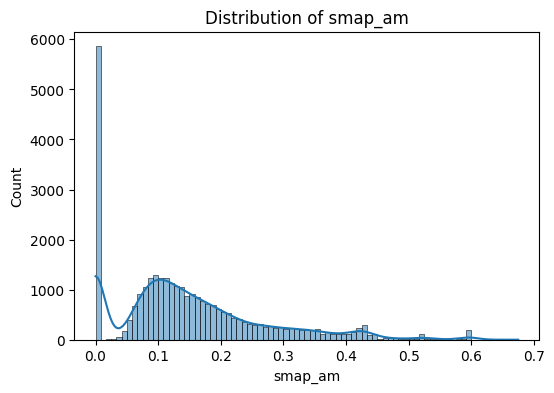

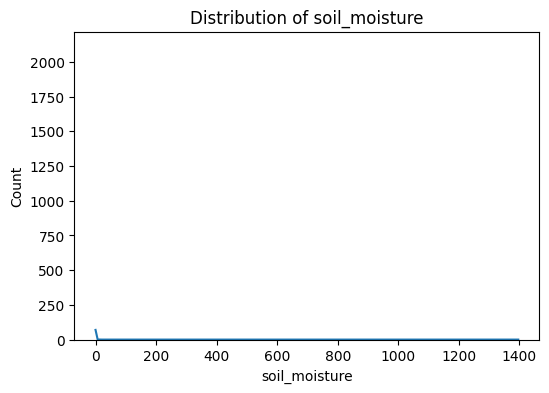

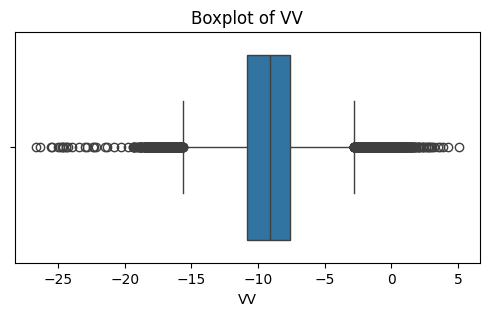

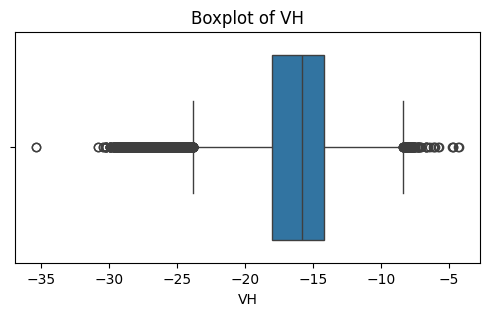

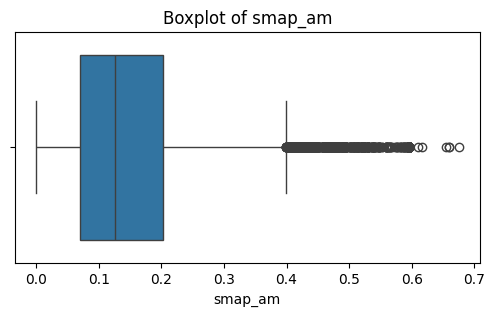

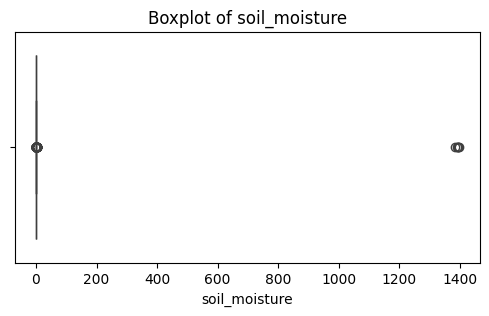

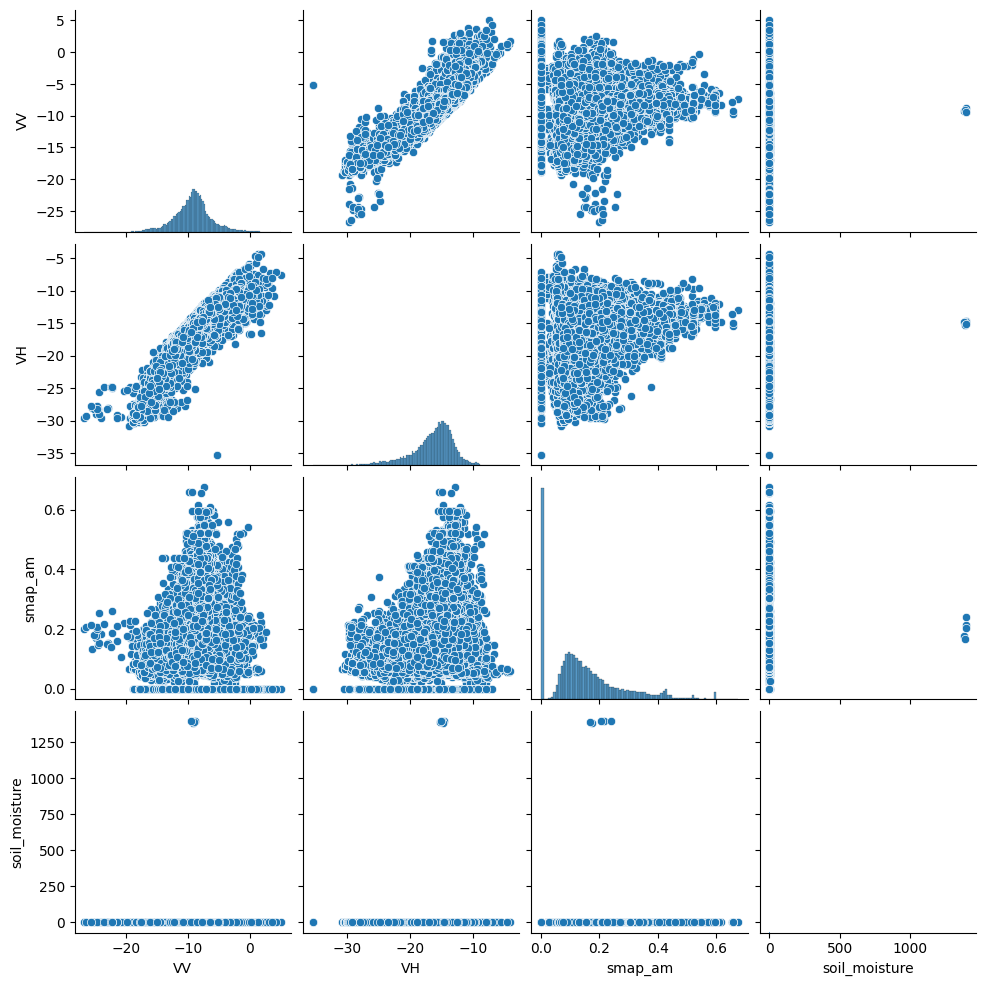


================ TARGET VARIABLE CHECK ================

Target Variable: soil_moisture
count    30747.000000
mean         0.412488
std         17.746967
min          0.000000
25%          0.078000
50%          0.174000
75%          0.279000
max       1396.570000
Name: soil_moisture, dtype: float64


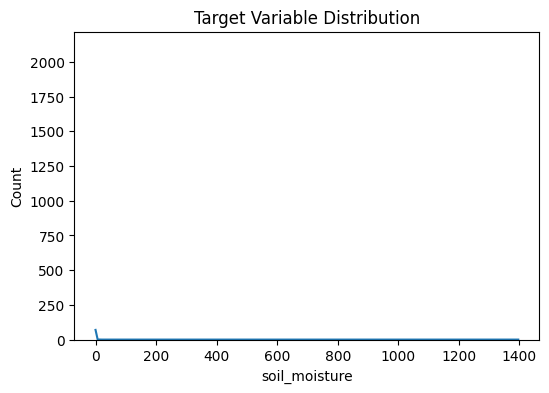


EDA Completed Successfully 🚀


In [46]:
# ==========================================
# FULL EXPLORATORY DATA ANALYSIS (EDA)
# ==========================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("\n================ BASIC INFO ================\n")

print("Shape of dataset:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())

print("\nData Types:\n")
print(df.dtypes)

print("\nMissing Values:\n")
print(df.isnull().sum())

print("\nDuplicate Rows:", df.duplicated().sum())

print("\n================ STATISTICAL SUMMARY ================\n")
display(df.describe())

# ==========================================
# Correlation Matrix
# ==========================================

plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# ==========================================
# Distribution Plots (Numerical Features)
# ==========================================

num_cols = df.select_dtypes(include=[np.number]).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# ==========================================
# Boxplots for Outlier Detection
# ==========================================

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# ==========================================
# Pairplot (if dataset not too large)
# ==========================================

if len(num_cols) <= 6:
    sns.pairplot(df[num_cols])
    plt.show()

print("\n================ TARGET VARIABLE CHECK ================\n")

# If you know target column, replace 'target_column' below
# Example: target_column = "Subsidence"

target_column = df.columns[-1]  # Assuming last column is target

print(f"Target Variable: {target_column}")
print(df[target_column].describe())

plt.figure(figsize=(6,4))
sns.histplot(df[target_column], kde=True)
plt.title("Target Variable Distribution")
plt.show()

print("\nEDA Completed Successfully 🚀")

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import AdamW

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor


# Core ML models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor,
    ExtraTreesRegressor
)
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# XGBoost
import xgboost as xgb

# CatBoost
from catboost import CatBoostRegressor

In [27]:
# ==========================================
# STEP 6: DATA PREPROCESSING
# ==========================================
print("\n--- Starting Data Preprocessing ---")

# Define features (X) and target (y)
X = df[['VV', 'VH', 'smap_am']]
y = df['soil_moisture']

# 80/20 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (Critical for Deep Learning convergence)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training data shape: {X_train_scaled.shape}")
print(f"Testing data shape: {X_test_scaled.shape}")


--- Starting Data Preprocessing ---
Training data shape: (24597, 3)
Testing data shape: (6150, 3)


In [11]:
!pip install catboost

--- Retraining Models on Cleaned Data ---
Clean Random Forest RMSE: 0.1212
Clean Random Forest R²: 0.0928


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Clean Deep Learning RMSE: 0.1221
Clean Deep Learning R²: 0.0790


/tmp/ipython-input-2643183940.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Random Forest', 'Deep Learning'], y=[rmse_rf_c, rmse_dl_c], palette='viridis')


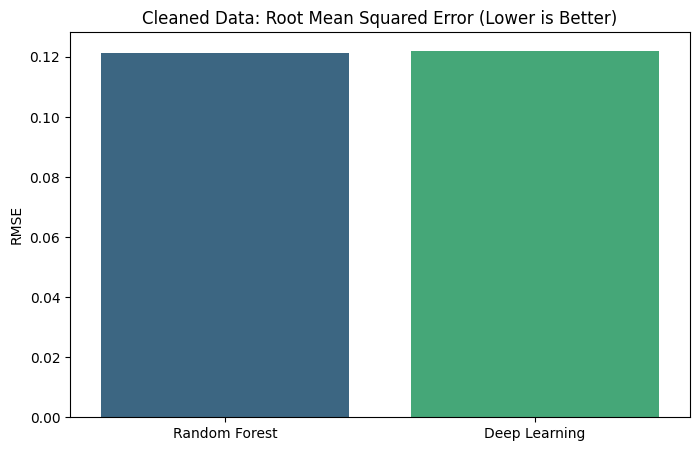

In [48]:
# ==========================================
# RETRAINING ON CLEAN DATA
# ==========================================
print("--- Retraining Models on Cleaned Data ---")

# Define features and target using the CLEAN dataset
X_clean = df_clean[['VV', 'VH', 'smap_am']]
y_clean = df_clean['soil_moisture']

# Train-Test Split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Feature Scaling
scaler_c = StandardScaler()
X_train_scaled_c = scaler_c.fit_transform(X_train_c)
X_test_scaled_c = scaler_c.transform(X_test_c)

# 1. Train Random Forest
rf_model_clean = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_model_clean.fit(X_train_scaled_c, y_train_c)
y_pred_rf_c = rf_model_clean.predict(X_test_scaled_c)

rmse_rf_c = np.sqrt(mean_squared_error(y_test_c, y_pred_rf_c))
r2_rf_c = r2_score(y_test_c, y_pred_rf_c)

print(f"Clean Random Forest RMSE: {rmse_rf_c:.4f}")
print(f"Clean Random Forest R²: {r2_rf_c:.4f}")

# 2. Train Deep Learning (MLP)
dl_model_clean = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled_c.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

dl_model_clean.compile(optimizer='adam', loss='mse', metrics=['mae'])
early_stop_c = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history_c = dl_model_clean.fit(
    X_train_scaled_c, y_train_c,
    validation_split=0.2,
    epochs=150,
    batch_size=32,
    callbacks=[early_stop_c],
    verbose=0
)

y_pred_dl_c = dl_model_clean.predict(X_test_scaled_c, verbose=0).flatten()
rmse_dl_c = np.sqrt(mean_squared_error(y_test_c, y_pred_dl_c))
r2_dl_c = r2_score(y_test_c, y_pred_dl_c)

print(f"Clean Deep Learning RMSE: {rmse_dl_c:.4f}")
print(f"Clean Deep Learning R²: {r2_dl_c:.4f}")

# Compare Models Visually
plt.figure(figsize=(8, 5))
sns.barplot(x=['Random Forest', 'Deep Learning'], y=[rmse_rf_c, rmse_dl_c], palette='viridis')
plt.title('Cleaned Data: Root Mean Squared Error (Lower is Better)')
plt.ylabel('RMSE')
plt.show()


================ CLEAN DATA BASIC INFO ================

Shape of Clean Dataset: (24866, 4)

Missing Values:

VV               0
VH               0
smap_am          0
soil_moisture    0
dtype: int64

Duplicate Rows: 11

================ STATISTICAL SUMMARY ================



,VV,VH,smap_am,soil_moisture
count,24866.000000,24866.000000,24866.000000,24866.000000
mean,-9.261041,-16.335428,0.181838,0.183887
std,2.930955,3.529411,0.109334,0.127245
min,-26.670000,-30.785200,0.020000,0.000000
25%,-10.902019,-18.000868,0.102497,0.075000
50%,-9.045182,-15.518319,0.149651,0.171000
75%,-7.614545,-14.015638,0.227346,0.278000
max,2.600890,-4.289361,0.674961,0.883000


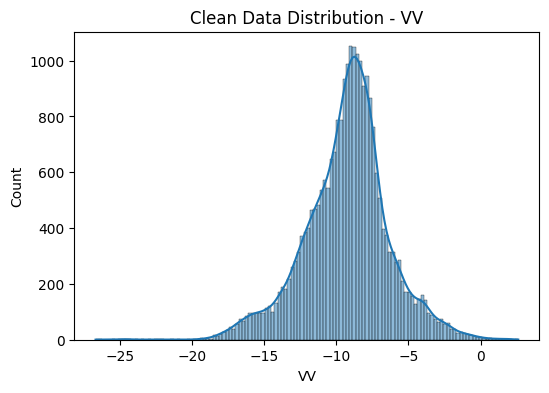

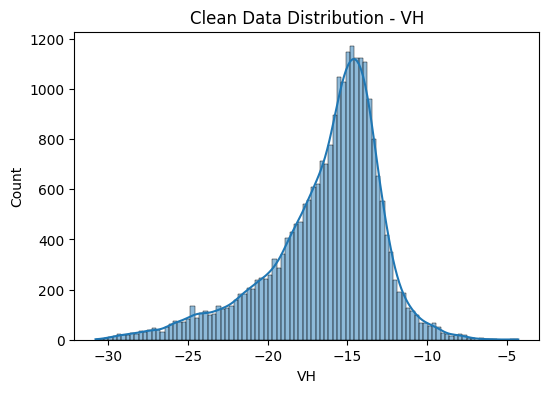

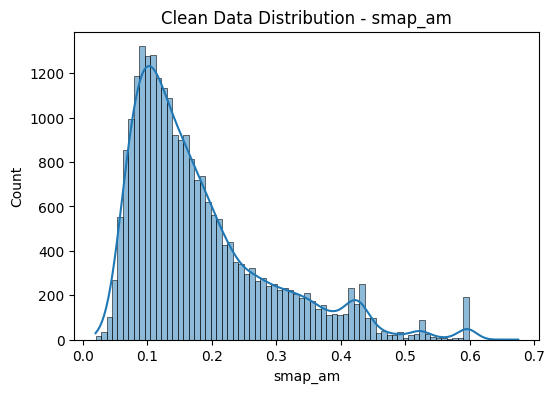

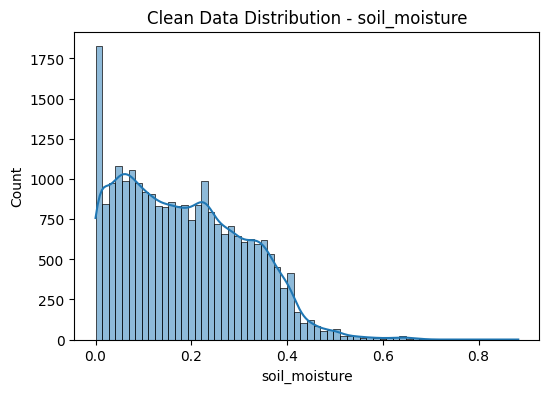

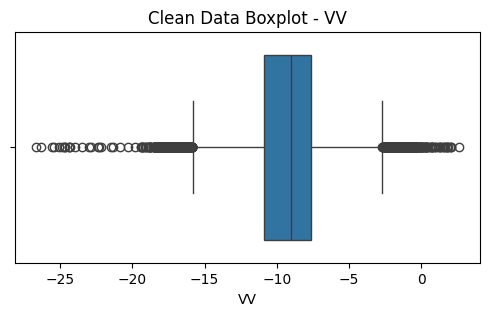

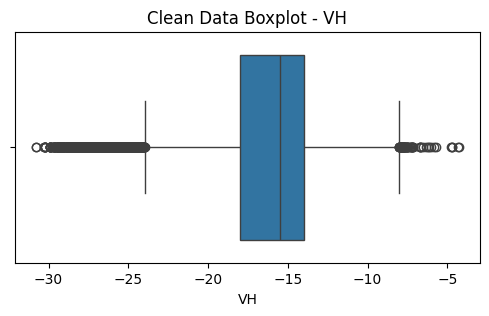

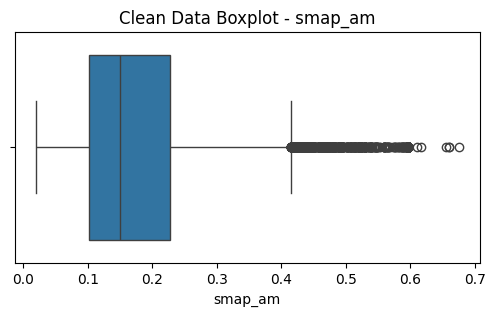

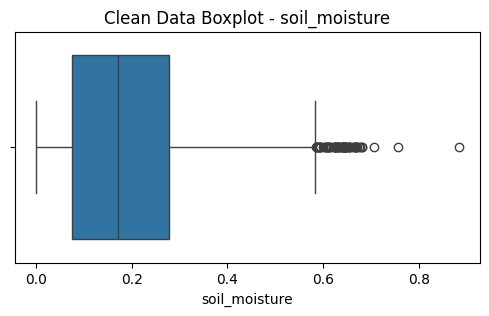

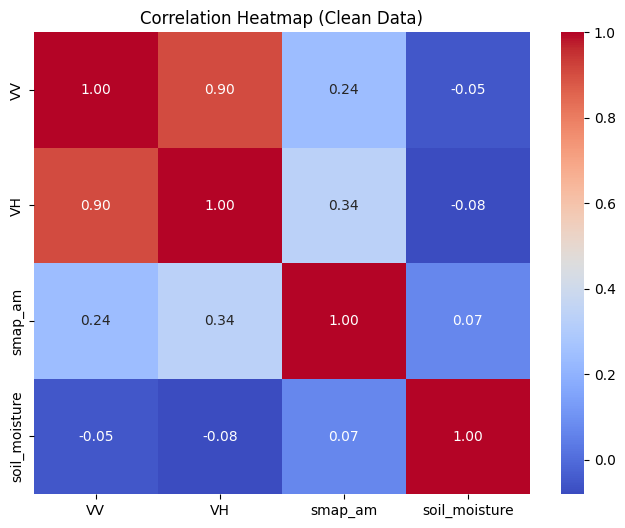

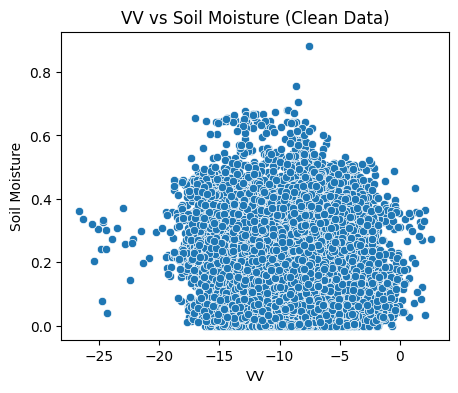

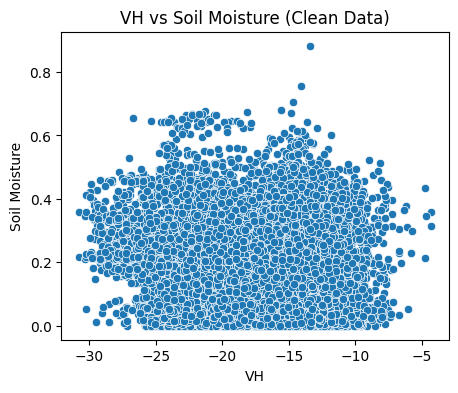

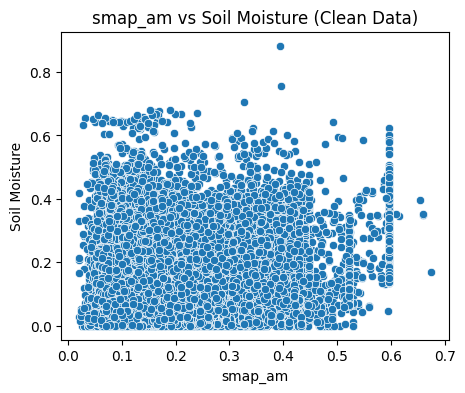


EDA on Clean Data Completed Successfully 🚀


In [49]:
# ==========================================
# EDA ON CLEANED DATA (df_clean)
# ==========================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("\n================ CLEAN DATA BASIC INFO ================\n")

print("Shape of Clean Dataset:", df_clean.shape)
print("\nMissing Values:\n")
print(df_clean.isnull().sum())
print("\nDuplicate Rows:", df_clean.duplicated().sum())

print("\n================ STATISTICAL SUMMARY ================\n")
display(df_clean.describe())

# ==========================================
# Distribution Plots
# ==========================================

num_cols = df_clean.select_dtypes(include=[np.number]).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_clean[col], kde=True)
    plt.title(f"Clean Data Distribution - {col}")
    plt.show()

# ==========================================
# Boxplots (Check Outlier Removal Impact)
# ==========================================

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df_clean[col])
    plt.title(f"Clean Data Boxplot - {col}")
    plt.show()

# ==========================================
# Correlation Heatmap
# ==========================================

plt.figure(figsize=(8,6))
corr_clean = df_clean.corr(numeric_only=True)

sns.heatmap(corr_clean, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Clean Data)")
plt.show()

# ==========================================
# Feature vs Target Analysis
# ==========================================

target = "soil_moisture"

for col in ['VV', 'VH', 'smap_am']:
    plt.figure(figsize=(5,4))
    sns.scatterplot(x=df_clean[col], y=df_clean[target])
    plt.title(f"{col} vs Soil Moisture (Clean Data)")
    plt.xlabel(col)
    plt.ylabel("Soil Moisture")
    plt.show()

print("\nEDA on Clean Data Completed Successfully 🚀")

In [34]:
print("\n--- Retraining Multiple Models with Engineered Features ---")

# ===============================
# Imports (Ensure these are present)
# ===============================
import numpy as np
import pandas as pd
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    explained_variance_score
)

# ===============================
# Function to Calculate Metrics
# ===============================
def evaluate_model(y_true, y_pred, n_features):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    evs = explained_variance_score(y_true, y_pred)

    # Adjusted R2
    n = len(y_true)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - n_features - 1)

    # MAPE (avoid divide by zero)
    mape = np.mean(np.abs((y_true - y_pred) /
                           np.where(y_true == 0, 1e-8, y_true))) * 100

    return {
        "RMSE": rmse,
        "MSE": mse,
        "MAE": mae,
        "R2": r2,
        "Adjusted_R2": adj_r2,
        "MAPE (%)": mape,
        "Explained Variance": evs
    }

# ===============================
# Define Advanced Model Dictionary
# ===============================

models_eng = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=12, random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=200, learning_rate=0.05, random_state=42),
    "SVR": SVR(kernel='rbf', C=100),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "XGBoost": xgb.XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        random_state=42,
        verbosity=0
    ),
    "CatBoost": CatBoostRegressor(
        iterations=300,
        learning_rate=0.05,
        depth=6,
        verbose=0,
        random_state=42
    )
}

results_eng = {}

# ===============================
# Train and Evaluate ML Models
# ===============================

for name, model in models_eng.items():
    print(f"\nTraining {name}...")

    model.fit(X_train_scaled_c, y_train_c)
    y_pred = model.predict(X_test_scaled_c)

    metrics = evaluate_model(y_test_c, y_pred, X_test_scaled_c.shape[1])
    results_eng[name] = metrics

    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

# ===============================
# Final Results as DataFrame
# ===============================

results_df = pd.DataFrame(results_eng).T
print("\n=== Final Model Comparison ===")
print(results_df.sort_values(by="RMSE"))


--- Retraining Multiple Models with Engineered Features ---

Training Linear Regression...
RMSE: 0.1258
MSE: 0.0158
MAE: 0.1056
R2: 0.0216
Adjusted_R2: 0.0210
MAPE (%): 70412981.2265
Explained Variance: 0.0216

Training Decision Tree...
RMSE: 0.1250
MSE: 0.0156
MAE: 0.1026
R2: 0.0341
Adjusted_R2: 0.0335
MAPE (%): 65519241.7958
Explained Variance: 0.0341

Training Random Forest...
RMSE: 0.1209
MSE: 0.0146
MAE: 0.1005
R2: 0.0969
Adjusted_R2: 0.0963
MAPE (%): 64477680.3782
Explained Variance: 0.0970

Training Extra Trees...
RMSE: 0.1260
MSE: 0.0159
MAE: 0.1026
R2: 0.0190
Adjusted_R2: 0.0184
MAPE (%): 60546128.4301
Explained Variance: 0.0190

Training Gradient Boosting...
RMSE: 0.1223
MSE: 0.0150
MAE: 0.1023
R2: 0.0751
Adjusted_R2: 0.0745
MAPE (%): 67023118.6395
Explained Variance: 0.0751

Training AdaBoost...
RMSE: 0.1266
MSE: 0.0160
MAE: 0.1072
R2: 0.0090
Adjusted_R2: 0.0084
MAPE (%): 77378881.5325
Explained Variance: 0.0319

Training SVR...
RMSE: 0.1222
MSE: 0.0149
MAE: 0.1018
R2: 0.07

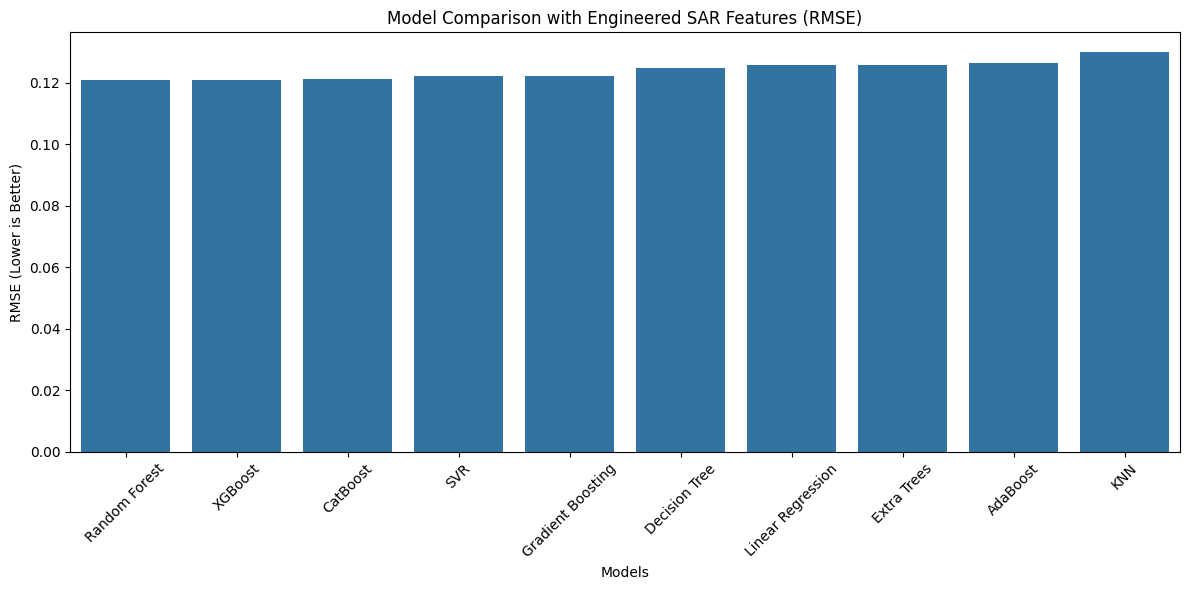

In [35]:
# ==========================================
# Model Comparison Plot (Sorted by RMSE)
# ==========================================

import matplotlib.pyplot as plt
import seaborn as sns

# Convert results to DataFrame if not already done
results_df = pd.DataFrame(results_eng).T

# Sort by RMSE (lower is better)
results_df_sorted = results_df.sort_values(by="RMSE")

plt.figure(figsize=(12,6))

sns.barplot(
    x=results_df_sorted.index,
    y=results_df_sorted["RMSE"]
)

plt.xticks(rotation=45)
plt.title("Model Comparison with Engineered SAR Features (RMSE)")
plt.ylabel("RMSE (Lower is Better)")
plt.xlabel("Models")

plt.tight_layout()
plt.show()

In [38]:
import joblib
from google.colab import files
import pandas as pd

print("--- Saving Best Model ---")

# Convert results dictionary to DataFrame
results_df = pd.DataFrame(results_eng).T

# Select best model based on lowest RMSE
best_model_name = results_df["RMSE"].idxmin()
best_model = models_eng[best_model_name]

# Save filename dynamically
filename = f"{best_model_name.replace(' ', '_').lower()}_soil_moisture_model.joblib"

# Save model
joblib.dump(best_model, filename)

print(f"Best Model: {best_model_name}")
print(f"Saved to: {filename}")

print("\n--- Triggering Download ---")
files.download(filename)

--- Saving Best Model ---
Best Model: Random Forest
Saved to: random_forest_soil_moisture_model.joblib

--- Triggering Download ---


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
print("\n--- Advanced ANN Model (PyTorch) ---")

# ===============================
# Imports
# ===============================
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

# ===============================
# Convert Data to Tensors
# ===============================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train_tensor = torch.tensor(X_train_scaled_c, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train_c.values, dtype=torch.float32).view(-1, 1).to(device)

X_test_tensor = torch.tensor(X_test_scaled_c, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test_c.values, dtype=torch.float32).view(-1, 1).to(device)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# ===============================
# Advanced ANN Architecture
# ===============================
class AdvancedANN(nn.Module):
    def __init__(self, input_dim):
        super(AdvancedANN, self).__init__()

        self.network = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.ReLU(),

            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.network(x)

model = AdvancedANN(X_train_scaled_c.shape[1]).to(device)

# ===============================
# Loss, Optimizer, Scheduler
# ===============================
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=10, factor=0.5)

# ===============================
# Training Loop with Early Stopping
# ===============================
best_loss = np.inf
patience = 10
counter = 0
epochs = 20

for epoch in range(epochs):
    model.train()
    running_loss = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    scheduler.step(epoch_loss)

    # Early Stopping
    if epoch_loss < best_loss:
        best_loss = epoch_loss
        counter = 0
        torch.save(model.state_dict(), "best_ann_model.pth")
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered")
            break

    if epoch % 20 == 0:
        print(f"Epoch [{epoch}/{epochs}] Loss: {epoch_loss:.6f}")

# ===============================
# Load Best Model
# ===============================
model.load_state_dict(torch.load("best_ann_model.pth"))
model.eval()

with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)

y_pred = y_pred_tensor.cpu().numpy().flatten()
y_true = y_test_tensor.cpu().numpy().flatten()

# ===============================
# Evaluation Metrics
# ===============================
def evaluate_model(y_true, y_pred, n_features):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    evs = explained_variance_score(y_true, y_pred)

    n = len(y_true)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - n_features - 1)
    mape = np.mean(np.abs((y_true - y_pred) /
                           np.where(y_true == 0, 1e-8, y_true))) * 100

    return {
        "RMSE": rmse,
        "MSE": mse,
        "MAE": mae,
        "R2": r2,
        "Adjusted_R2": adj_r2,
        "MAPE (%)": mape,
        "Explained Variance": evs
    }

metrics_ann = evaluate_model(y_true, y_pred, X_test_scaled_c.shape[1])

print("\n=== Advanced ANN Model Performance ===")
for metric_name, value in metrics_ann.items():
    print(f"{metric_name}: {value:.4f}")

results_df = pd.DataFrame([metrics_ann], index=["Advanced ANN"])
print("\n=== Final Results ===")
print(results_df)


# ===============================
# Store Results in Dictionary
# ===============================

results_dl = {}   # Create DL results dictionary

results_dl["Advanced ANN"] = metrics_ann

print("\n=== Advanced ANN Model Performance ===")
for metric_name, value in metrics_ann.items():
    print(f"{metric_name}: {value:.4f}")

# Convert to DataFrame (optional for viewing)
results_dl_df = pd.DataFrame(results_dl).T

print("\n=== Deep Learning Results Stored ===")
print(results_dl_df)


--- Advanced ANN Model (PyTorch) ---
Epoch [0/20] Loss: 0.018188

=== Advanced ANN Model Performance ===
RMSE: 0.1233
MSE: 0.0152
MAE: 0.1034
R2: 0.0608
Adjusted_R2: 0.0602
MAPE (%): 67289584.0000
Explained Variance: 0.0614

=== Final Results ===
                  RMSE     MSE      MAE        R2  Adjusted_R2    MAPE (%)  \
Advanced ANN  0.123288  0.0152  0.10342  0.060785     0.060218  67289584.0   

              Explained Variance  
Advanced ANN            0.061425  

=== Advanced ANN Model Performance ===
RMSE: 0.1233
MSE: 0.0152
MAE: 0.1034
R2: 0.0608
Adjusted_R2: 0.0602
MAPE (%): 67289584.0000
Explained Variance: 0.0614

=== Deep Learning Results Stored ===
                  RMSE     MSE      MAE        R2  Adjusted_R2    MAPE (%)  \
Advanced ANN  0.123288  0.0152  0.10342  0.060785     0.060218  67289584.0   

              Explained Variance  
Advanced ANN            0.061425  


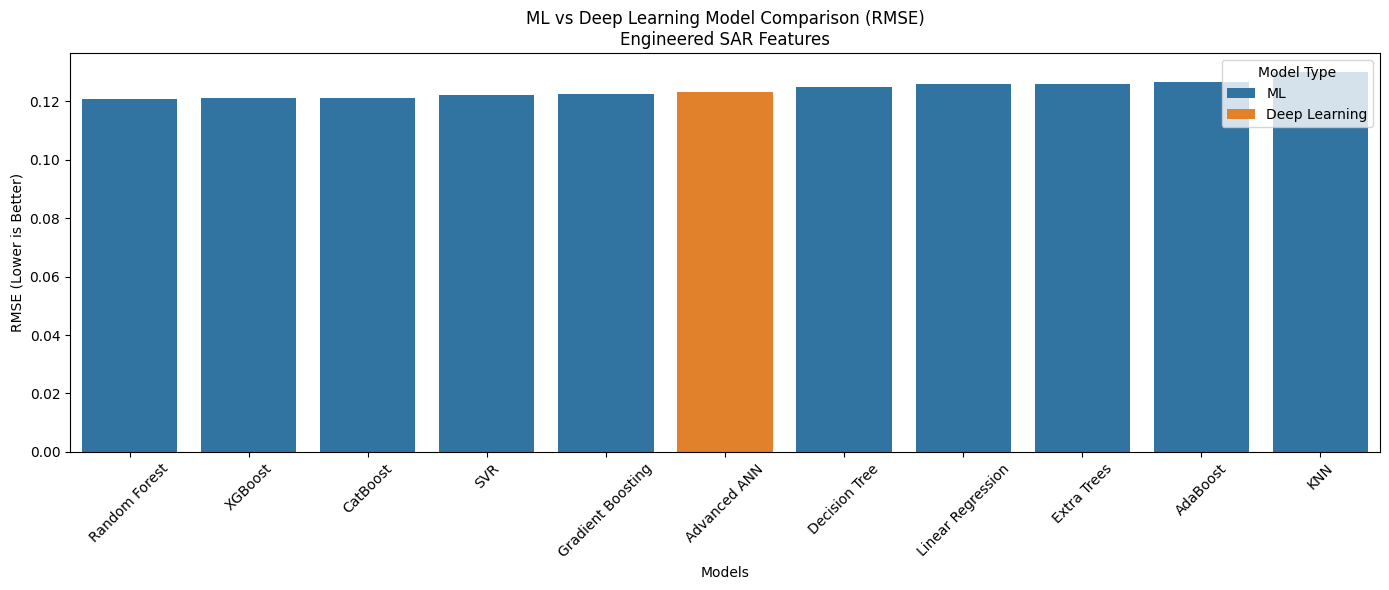

In [45]:
# ==========================================
# Model Comparison Plot (ML + DL)
# ==========================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert ML results
results_ml_df = pd.DataFrame(results_eng).T

# Convert DL results (if not already dataframe)
results_dl_df = pd.DataFrame(results_dl).T

# Add model type column
results_ml_df["Type"] = "ML"
results_dl_df["Type"] = "Deep Learning"

# Combine both
results_combined = pd.concat([results_ml_df, results_dl_df])

# Sort by RMSE
results_sorted = results_combined.sort_values(by="RMSE")

plt.figure(figsize=(14,6))

sns.barplot(
    data=results_sorted,
    x=results_sorted.index,
    y="RMSE",
    hue="Type"
)

plt.xticks(rotation=45)
plt.title("ML vs Deep Learning Model Comparison (RMSE)\nEngineered SAR Features")
plt.ylabel("RMSE (Lower is Better)")
plt.xlabel("Models")
plt.legend(title="Model Type")

plt.tight_layout()
plt.show()